In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.models import alexnet, vgg16, resnet50, vgg19_bn
from torchviz import make_dot
from model import PoseModel, PoseClassModel, ModifiedAlexNet

In [2]:
model = PoseClassModel(model_name='alexnet', num_class=19)
# model = ModifiedAlexNet().features
inputs = torch.randn(1, 3, 384, 384)
y = model(Variable(inputs))
# make_dot(y)
# y.size()

RuntimeError: size mismatch, m1: [1 x 4096], m2: [6400 x 4096] at /pytorch/torch/lib/TH/generic/THTensorMath.c:1293

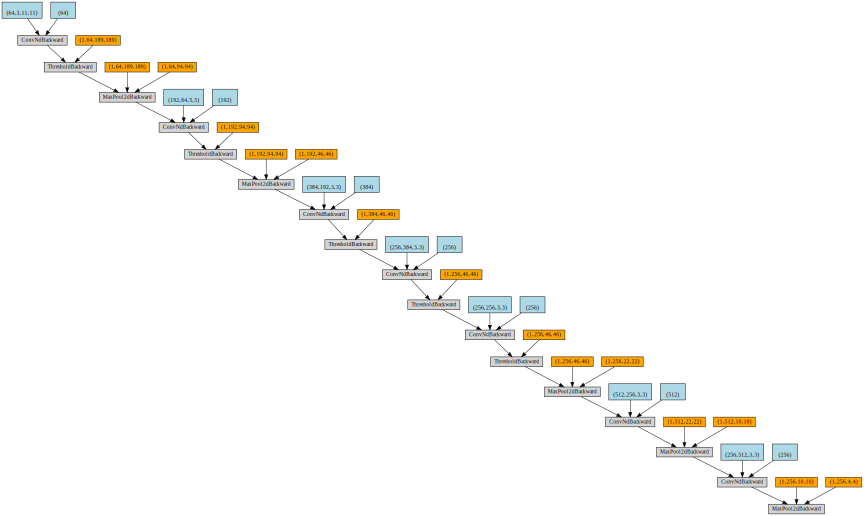

In [3]:
model1 = nn.Sequential(model.features_top, model.features_bottom)
inputs = torch.randn(1, 3, 384, 384)
y = model1(Variable(inputs))
make_dot(y)

In [6]:
model

PoseClassModel (
  (features_top): Sequential (
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(2, 2), padding=(2, 2))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
  )
  (features_bottom): Sequential (
    (0): Sequential (
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU (inplace)
      (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    )
    (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0)

In [ ]:
vggbn = vgg19_bn()

In [11]:
vggbn

VGG (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU (inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU (inplace)
    (6): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (9): ReLU (inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
    (12): ReLU (inplace)
    (13): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
    (16): ReLU (inplace)
    (17): Con

In [10]:
list(vggbn.features.children())[:36]

[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
 ReLU (inplace),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
 ReLU (inplace),
 MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1)),
 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True),
 ReLU (inplace),
 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True),
 ReLU (inplace),
 MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1)),
 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True),
 ReLU (inplace),
 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True),
 ReLU (inplace),
 Conv2d(256, 256, kernel_siz